In [5]:
import os
import cv2
import numpy as np

# Path to the dataset
dataset_path = "/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k"

# List images and labels
images_path = os.path.join(dataset_path, "images/100k/train")


# Example: Load an image and its corresponding label
image_files = os.listdir(images_path)

print(f"Total images: {len(image_files)}")


Total images: 1160


In [6]:
import json

# Load labels
labels_path = "/kaggle/input/solesensei_bdd100k/bdd100k_labels_release/bdd100k/labels/bdd100k_labels_images_train.json"
with open(labels_path, "r") as f:
    labels = json.load(f)

print(f"Total labels: {len(labels)}")

Total labels: 69863


In [7]:
# Create a dictionary to map image names to labels
label_dict = {label['name']: label for label in labels}

# Example: Get the label for the first image
sample_image_name = image_files[0]
sample_label = label_dict.get(sample_image_name, None)

print(f"Image: {sample_image_name}")
print(f"Label: {sample_label}")

Image: 429c57cd-d75c693b.jpg
Label: {'name': '429c57cd-d75c693b.jpg', 'attributes': {'weather': 'clear', 'scene': 'city street', 'timeofday': 'daytime'}, 'timestamp': 10000, 'labels': [{'category': 'car', 'attributes': {'occluded': True, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 303.74979, 'y1': 456.299703, 'x2': 445.499693, 'y2': 503.54967}, 'id': 724536}, {'category': 'car', 'attributes': {'occluded': True, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 722.249503, 'y1': 454.612203, 'x2': 737.436993, 'y2': 481.612184}, 'id': 724537}, {'category': 'car', 'attributes': {'occluded': True, 'truncated': False, 'trafficLightColor': 'none'}, 'manualShape': True, 'manualAttributes': True, 'box2d': {'x1': 681.753165, 'y1': 451.237205, 'x2': 723.937002, 'y2': 486.000436}, 'id': 724538}, {'category': 'car', 'attributes': {'occluded': True, 'truncated': False, 

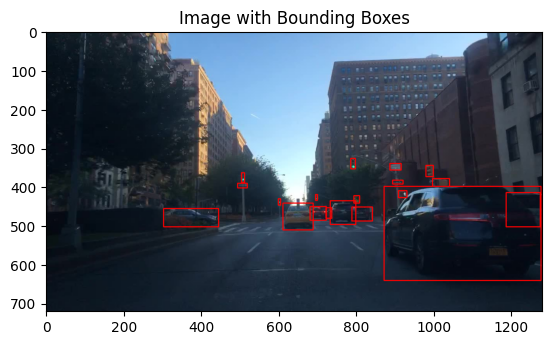

In [8]:
import matplotlib.pyplot as plt

# Load an image
sample_image = cv2.imread(os.path.join(images_path, sample_image_name))
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Draw bounding boxes
for obj in sample_label['labels']:
    if 'box2d' in obj:
        x1, y1 = int(obj['box2d']['x1']), int(obj['box2d']['y1'])
        x2, y2 = int(obj['box2d']['x2']), int(obj['box2d']['y2'])
        cv2.rectangle(sample_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image
plt.imshow(sample_image)
plt.title("Image with Bounding Boxes")
plt.show()

In [10]:
pip install albumentations

Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


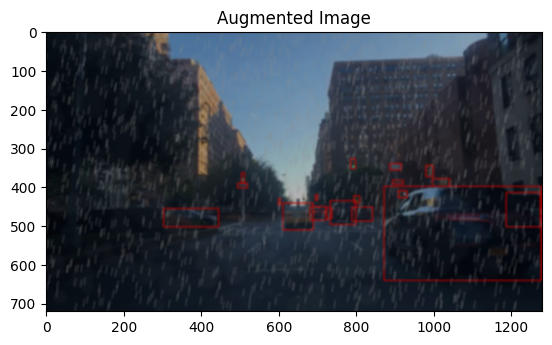

In [11]:
import albumentations as A

# Define augmentation pipeline
transform = A.Compose([
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.5, p=0.5),
    A.RandomRain(p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), p=0.2),
    A.RandomBrightnessContrast(p=0.2),
])

# Apply augmentation to an image
augmented_image = transform(image=sample_image)['image']
plt.imshow(augmented_image)
plt.title("Augmented Image")
plt.show()

In [1]:
import os
import cv2
import numpy as np
import albumentations as A

# Path to the dataset
dataset_path = "/kaggle/input/solesensei_bdd100k/bdd100k/bdd100k"
images_path = os.path.join(dataset_path, "images/100k/train")
image_files = os.listdir(images_path)

# Define augmentation pipeline
transform = A.Compose([
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.5, p=0.5),
    A.RandomRain(p=0.5),
    A.GaussianBlur(blur_limit=(3, 7), p=0.2),
    A.RandomBrightnessContrast(p=0.2),
])

# Create directory for augmented images
augmented_images_path = "/kaggle/working/augmented_images"
os.makedirs(augmented_images_path, exist_ok=True)

# Process images
for image_file in image_files:
    image_path = os.path.join(images_path, image_file)
    image = cv2.imread(image_path)

    # Check if the image is loaded correctly
    if image is None:
        print(f"Error loading image: {image_file}")
        continue

    # Apply augmentation
    augmented_image = transform(image=image)['image']

    # Save augmented image
    output_path = os.path.join(augmented_images_path, image_file)
    cv2.imwrite(output_path, augmented_image)

print("Augmentation complete!")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Error loading image: testB
Error loading image: testA
Error loading image: trainB
Error loading image: trainA
Augmentation complete!


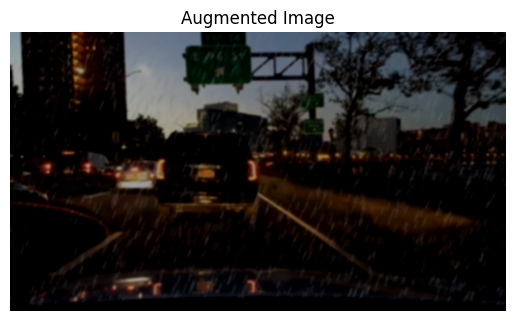

In [4]:
import cv2
import matplotlib.pyplot as plt
# Load the image
image_path = "/kaggle/working/augmented_images/01a54273-6df5e1d3.jpg"
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image at {image_path}")
else:
    # Convert from BGR to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image using matplotlib
    plt.imshow(image_rgb)
    plt.title("Augmented Image")
    plt.axis('off')  # Hide axes
    plt.show()

In [5]:
# Original bounding boxes (format: [x_min, y_min, x_max, y_max, class_id])
original_bboxes = [
    [100, 150, 200, 300, 0],  # Example: [x_min, y_min, x_max, y_max, class_id]
    [250, 200, 400, 350, 1],
]

# For non-spatial augmentations, labels remain the same
augmented_bboxes = original_bboxes

In [11]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
import random
import shutil

# Path to augmented images and labels
augmented_images_path = "/kaggle/working/augmented_images"
images_folder = os.path.join(augmented_images_path, "images")
labels_folder = os.path.join(augmented_images_path, "labels")

# Output directory for train/val split
output_path = "/kaggle/working/dataset"
os.makedirs(output_path, exist_ok=True)

# List image files
image_files = os.listdir(images_folder)
random.shuffle(image_files)  # Shuffle for randomness

# Split ratio (80% train, 20% val)
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)

# Create train/val directories
train_images_path = os.path.join(output_path, "images/train")
train_labels_path = os.path.join(output_path, "labels/train")
val_images_path = os.path.join(output_path, "images/val")
val_labels_path = os.path.join(output_path, "labels/val")

os.makedirs(train_images_path, exist_ok=True)
os.makedirs(train_labels_path, exist_ok=True)
os.makedirs(val_images_path, exist_ok=True)
os.makedirs(val_labels_path, exist_ok=True)

# Split and move images and labels
for i, image_file in enumerate(image_files):
    image_name = os.path.splitext(image_file)[0]  # Remove file extension
    label_file = f"{image_name}.txt"  # Corresponding label file

    if i < split_index:
        # Move to train folder
        shutil.move(os.path.join(images_folder, image_file), os.path.join(train_images_path, image_file))
        if os.path.exists(os.path.join(labels_folder, label_file)):
            shutil.move(os.path.join(labels_folder, label_file), os.path.join(train_labels_path, label_file))
    else:
        # Move to val folder
        shutil.move(os.path.join(images_folder, image_file), os.path.join(val_images_path, image_file))
        if os.path.exists(os.path.join(labels_folder, label_file)):
            shutil.move(os.path.join(labels_folder, label_file), os.path.join(val_labels_path, label_file))

print("Dataset split complete!")

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/augmented_images/images'